In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

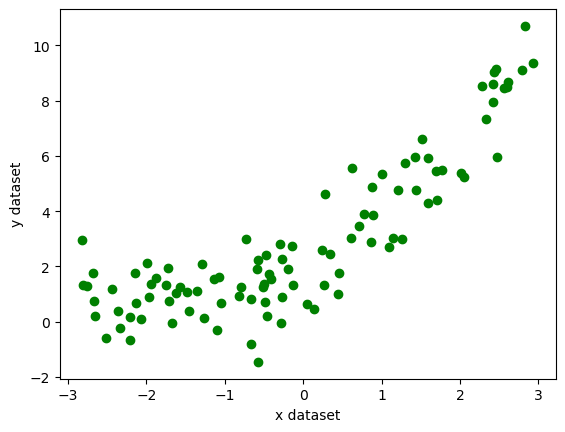

In [3]:
# quadratic equation used -- y=0.5x^2+5x+2+outliers
X=6*np.random.rand(100,1)-3
y=0.5*X**2 +1.5*X+2+np.random.randn(100,1)

# plot the equations

plt.scatter(X,y,color='g')
plt.xlabel("x dataset")
plt.ylabel("y dataset")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [5]:
## lets implement simple linear regression
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

In [6]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression_1.predict(X_test))
print(score)

0.7403382183870371


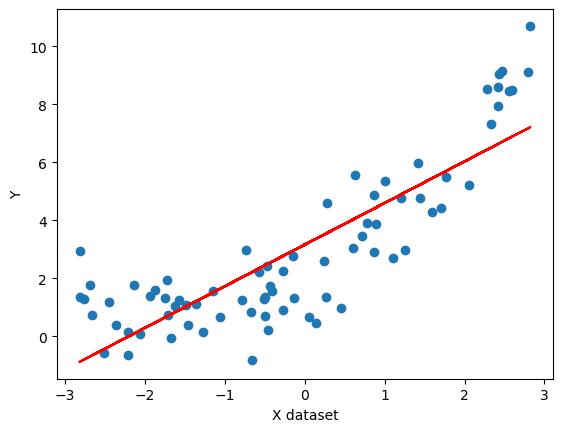

In [9]:
# lets visualize this model
plt.plot(X_train,regression_1.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X dataset")
plt.ylabel("Y")
plt.show()

In [10]:
# lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [12]:
X_train_poly

array([[ 1.00000000e+00, -2.81797452e+00,  7.94098041e+00],
       [ 1.00000000e+00,  1.59571272e+00,  2.54629907e+00],
       [ 1.00000000e+00, -2.66608507e+00,  7.10800959e+00],
       [ 1.00000000e+00,  1.25797240e+00,  1.58249456e+00],
       [ 1.00000000e+00,  8.90022111e-01,  7.92139358e-01],
       [ 1.00000000e+00,  4.82935169e-02,  2.33226378e-03],
       [ 1.00000000e+00, -7.36005164e-01,  5.41703601e-01],
       [ 1.00000000e+00,  1.42290705e+00,  2.02466446e+00],
       [ 1.00000000e+00, -2.68552349e+00,  7.21203644e+00],
       [ 1.00000000e+00,  1.44461781e+00,  2.08692061e+00],
       [ 1.00000000e+00, -2.20777919e+00,  4.87428895e+00],
       [ 1.00000000e+00, -2.21147277e+00,  4.89061179e+00],
       [ 1.00000000e+00, -1.05435024e+00,  1.11165442e+00],
       [ 1.00000000e+00,  4.49203369e-01,  2.01783667e-01],
       [ 1.00000000e+00, -1.94177395e+00,  3.77048609e+00],
       [ 1.00000000e+00,  2.82520290e+00,  7.98177141e+00],
       [ 1.00000000e+00, -1.62651878e+00

In [13]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
score = r2_score(y_pred,y_test)
print(score)

0.8308499577620851


In [14]:
print(regression.coef_)

[[0.         1.4650266  0.44999101]]


In [15]:
print(regression.intercept_)

[1.94650299]


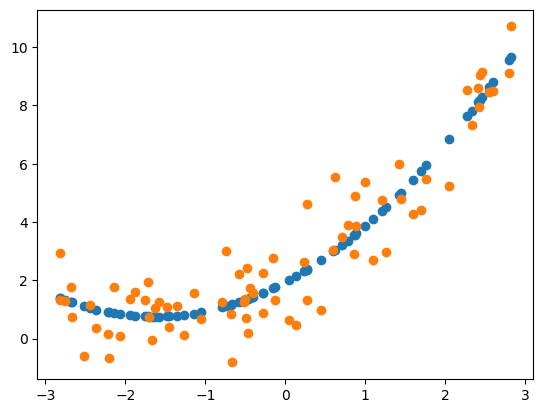

In [17]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)
plt.show()

In [18]:
# prediction of the new data
X_new =np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)

In [19]:
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

# pipeline in polynomial

In machine learning, a pipeline is a tool that allows you to chain multiple steps together to streamline the process of preprocessing, model training, and evaluation. For polynomial regression, the pipeline can be particularly useful because it allows you to combine feature transformation (like polynomial feature expansion) and regression modeling into one cohesive workflow.

Polynomial Regression Pipeline
The polynomial regression model involves transforming the input features into polynomial features, then fitting a regression model (e.g., Linear Regression) on the transformed data.

We can use Pipeline from sklearn.pipeline to achieve this.

Here's an example of how to create a pipeline for polynomial regression:

Step-by-Step Explanation
Polynomial Features Transformation:
Polynomial features are generated using PolynomialFeatures from sklearn.preprocessing. This transformation creates polynomial combinations of the features up to a specified degree. For example, if you have a feature 
x
x, you can transform it into 
x
2
x 
2
 , 
x
3
x 
3
 , etc.
Regression Model:
After the features are transformed, we apply a regression model like LinearRegression to the expanded feature set.
Pipeline:
The Pipeline object allows you to combine these steps into a single workflow, so that the transformations and model fitting are handled together.

In [20]:
from sklearn.pipeline import Pipeline


In [37]:
def poly_regression(degree):
    X_new =np.linspace(-3,3,200).reshape(200,1)
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train)
    y_pred_new=poly_regression.predict(X_new)

    # plotting predictation line

    plt.plot(X_new,y_pred_new,'r',label="Degree" + str(degree),linewidth=2)
    plt.plot(X_train,y_train,'b.',linewidth=3)
    plt.plot(X_test,y_test,'g.',linewidth=3)
    plt.legend(loc='upper left')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4,4,0,10])
    plt.show()



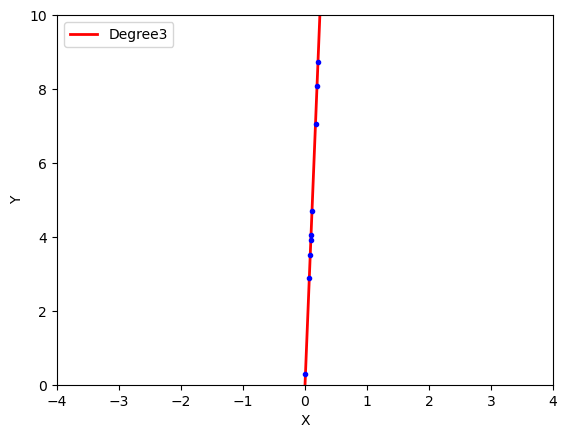

In [38]:
poly_regression(3)